# Lab 5: Perceptual modeling
Explore different perceptual masking topics used in audio coding.

## References:

### Bark scale
The Bark scale is a perceptual scale that divides the audible frequency range into critical bands, based on how the human ear perceives sound.

### Critical bands
The Bark scale divides the audible frequency spectrum (roughly 20 Hz to 20,000 Hz) into 24 critical bands. Each critical band corresponds to a range of frequencies that the human ear processes as a single unit. Within a critical band, multiple sound frequencies can interact, leading to auditory masking (one sound making another sound less audible).

### Masking threshold in quiet
The masking threshold in quiet refers to the minimum sound intensity level at a specific frequency that is audible to the human ear in a quiet environment, with no background noise. This threshold is important in psychoacoustics, as it defines the point at which a sound becomes detectable by a listener in an ideal, quiet setting.

### Frequency masking
Frequency masking is a psychoacoustic phenomenon where a louder sound at a certain frequency makes it difficult or impossible to hear a quieter sound at a nearby frequency. Essentially, when two sounds occur simultaneously but at different frequencies, the louder sound can "mask" or cover up the quieter one, especially if they are close in frequency. This effect plays a crucial role in how humans perceive complex sound environments.

### Spreading function
The spreading function refers to a model used in psychoacoustics to describe how masking effects spread across frequencies. It quantifies how the influence of a louder sound at a specific frequency spreads and affects the perception of quieter sounds across nearby frequencies.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io.wavfile import read
import scipy.signal as signal
from scipy.fftpack import fft, ifft


## Part 1 - Bark Scale

explore the Bark scale. Answer the questions given and modify the code as needed to support your answers.

In [ ]:
def read_sound(file):
  """ read a mono wav sound file, assuming is mono, and convert it to a floating point array
    Args:
      file (str): File name
    Returns:
      sound_array (numpy.array): Array of samples as floating point values between -1 and 1
      sampling_rate (int): Sampling rate
  """
  # read sound file
  sampling_rate, x = read(file)
  # convert to floating point values between -1 and 1, assuming x are 16 bit integers
  sound_array = np.float32(x) / 2**15
  return sound_array, sampling_rate

def display_sound(sound_array, sampling_rate=44100):
  """ Display signal sound_array
    Args:
      sound_array (numpy.array): Array of samples
      sampling_rate (int): Sampling rate
  """
  # plot the waveform of the sound
  plt.figure(0, figsize=(10, 2))
  time_indexes = np.arange(0, sound_array.size/sampling_rate, 1.0/sampling_rate)
  plt.plot(time_indexes, sound_array)
  plt.xlabel('time (seconds)')
  plt.ylabel('amplitude')
  plt.show()
  # play the sound
  ipd.display(ipd.Audio(data=sound_array, rate=sampling_rate, normalize=False))

# Define the Bark scale conversion function
def hz2bark(f):
    """ Usage: Bark=hz2bark(f)
    f    : (ndarray)    Array containing frequencies in Hz.
    Returns  :
    Brk  : (ndarray)    Array containing Bark scaled values.
    """
    Brk = 6. * np.arcsinh(f/600.)
    return Brk

def bark2hz(Brk):
    """ Usage:
    Hz=bark2hs(Brk)
    Args     :
        Brk  : (ndarray)    Array containing Bark scaled values.
    Returns  :
        Fhz  : (ndarray)    Array containing frequencies in Hz.
    """

    Fhz = 600. * np.sinh(Brk/6.)
    return Fhz

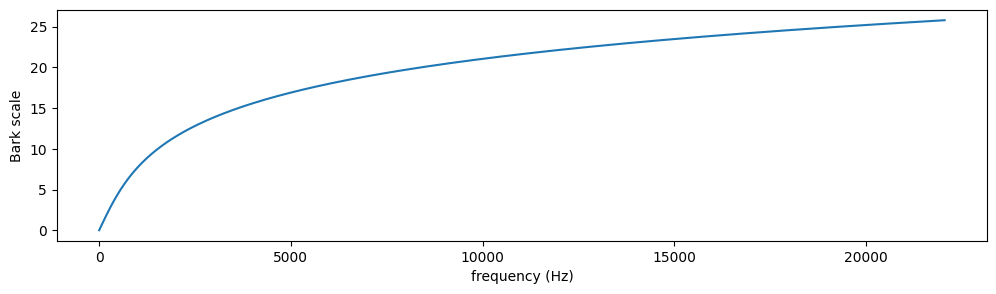

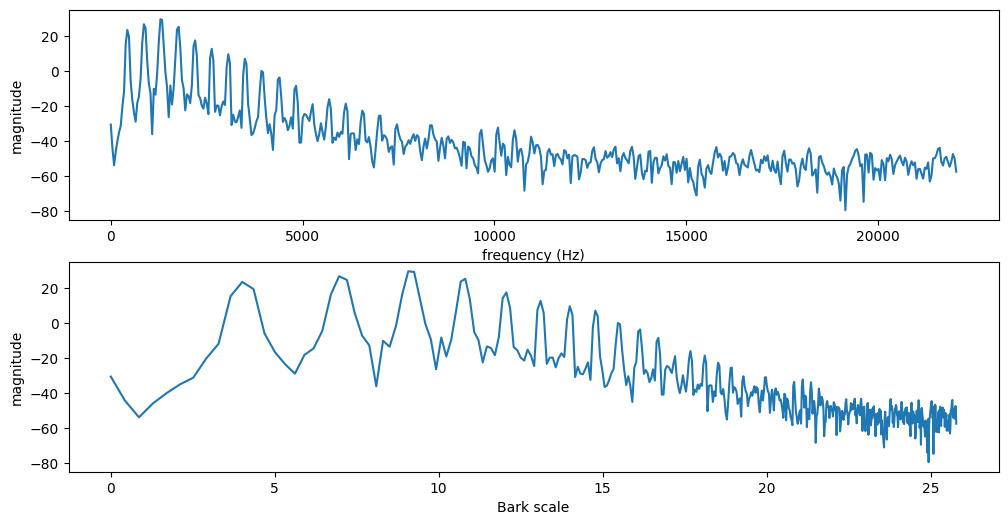

In [ ]:
# compute and plot the bark scale

freqs = np.linspace(0,22050,512)
bark_scale = hz2bark(freqs)

# Plot the Bark scale
plt.figure(figsize=(12, 3))
plt.plot(freqs, bark_scale)
plt.xlabel("frequency (Hz)")
plt.ylabel("Bark scale")

# plot the magnitude spectrum of a sound in the bark scale
x, fs = read_sound('/content/drive/MyDrive/UNI/UPF/5è CURS/1r TRIM/SISTEMES DE CODIFICACIÓ ÀUDIO I VÍDEO/audio-coding-materials-main/sounds/487465-trumpet.wav')
N = 1024
x1 = x[10000:10000+N]

# compute the hanning window
w = signal.get_window('hann', N)
# compute the spectrum of the windowed input signal
spectrum = fft(w*x1)
# compute the magnitude spectrum in dB
magnitude_spectrum = 20*np.log10(abs(spectrum[:N//2]))

# Plot the original FFT and the Bark scale spectrum
plt.figure(figsize=(12, 6))

bark_scale = hz2bark(freqs)

plt.subplot(2, 1, 1)
frequency_indexes =np.linspace(0,fs/2, N//2)
plt.plot(frequency_indexes, magnitude_spectrum)
plt.xlabel("frequency (Hz)")
plt.ylabel("magnitude")

plt.subplot(2, 1, 2)
plt.plot(bark_scale, magnitude_spectrum)
plt.xlabel("Bark scale")
plt.ylabel("magnitude")

plt.show()

**Questions:**

1. **Compute and show the magnitude spectrum of a sound (choose any sound), with different frequency axis, in particular, linear frequency, logarithmic frequency, and using the bark scale. Describe the differences and explain possible advantages and disadvantages of each representation for general audio processing applications.**

- Freqüència lineal: Mostra l’espectre de magnitud amb les freqüències distribuïdes de manera uniforme, destacant cada component harmònic de manera directa, però comprimeix les freqüències altes, dificultant la percepció dels detalls a amplituds baixes. És útil per a l’anàlisi detallada dels components harmònics individuals.

- Freqüència logarítmica: Representa les freqüències en una escala comprimida que s’aproxima més a la percepció humana. Expandeix les freqüències baixes i comprimeix les altes, reflectint millor la percepció humana però distorsionant les relacions de freqüència.

- Escala de Bark: Mostra l’espectre de magnitud segons bandes crítiques perceptuals, alineant-se amb la manera en què l’oïda humana percep el so. És bona per a la compressió d’àudio i l’anàlisi psicoacústica, però pot fer perdre resolució en la informació espectral detallada, especialment a les freqüències altes.

## Part 2 - Masking threshold of quiet

Explore the masking threshold of quiet, answer the questions given and modify the code as needed to support the answers.

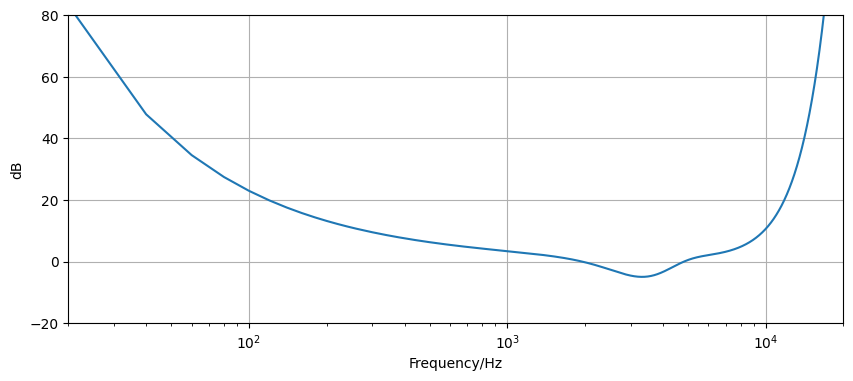

In [ ]:
# compute and display the the threshold curve of quiet

f=np.linspace(20,20000,1000)
LTQ=3.64*(f/1000.)**-0.8 -6.5*np.exp(-0.6*(f/1000.-3.3)**2.)+1e-3*((f/1000.)**4.)
plt.figure(figsize=(10,4))
plt.semilogx(f,LTQ)
plt.axis([20,20000, -20,80])
plt.xlabel('Frequency/Hz')
plt.ylabel('dB')
plt.grid()

<ipython-input-7-5f9794770596>:5: RuntimeWarning: divide by zero encountered in power
  LTQ=np.clip((3.64*(f/1000.)**-0.8 -6.5*np.exp(-0.6*(f/1000.- 3.3)**2.)+1e-3*((f/1000.)**4.)),-20,60)


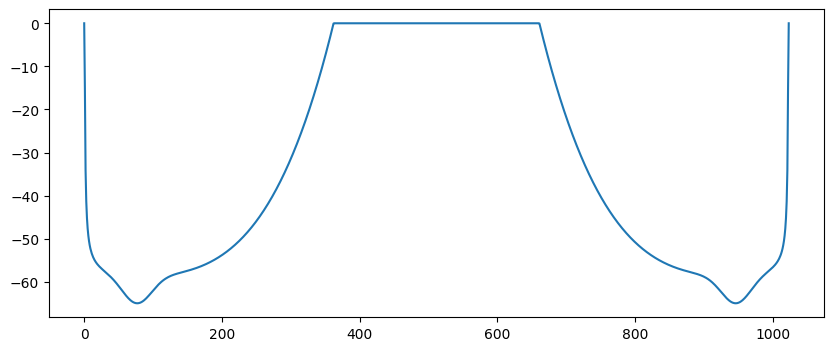

In [ ]:
# adapt the magnitude threshold of quiet to a curve to be used in a spectrum
fs = 44100    # sampling frequency
N = 1024      # number of subbands
f = np.linspace(0,fs/2, N//2)
LTQ=np.clip((3.64*(f/1000.)**-0.8 -6.5*np.exp(-0.6*(f/1000.- 3.3)**2.)+1e-3*((f/1000.)**4.)),-20,60)
LTQ=np.append(LTQ-60, np.flip(LTQ-60))
plt.figure(figsize=(10,4))
plt.plot(LTQ)

In [ ]:
# apply the masking curve of quiet to 3 sounds

x1, fs1 = read_sound('/content/drive/MyDrive/UNI/UPF/5è CURS/1r TRIM/SISTEMES DE CODIFICACIÓ ÀUDIO I VÍDEO/audio-coding-materials-main/sounds/white-noise.wav')
x2, fs2 = read_sound('/content/drive/MyDrive/UNI/UPF/5è CURS/1r TRIM/SISTEMES DE CODIFICACIÓ ÀUDIO I VÍDEO/audio-coding-materials-main/sounds/synthetic.wav')
x3, fs3 = read_sound('/content/drive/MyDrive/UNI/UPF/5è CURS/1r TRIM/SISTEMES DE CODIFICACIÓ ÀUDIO I VÍDEO/audio-coding-materials-main/sounds/721313-hangpan.wav')

y1 = np.zeros(len(x1))
y2 = np.zeros(len(x2))
y3 = np.zeros(len(x3))


def apply_masking_curve(x, y, fs):
    i = 0
    while i < x.size - N:
        w = signal.get_window('hann', N)
        xw = x[i:i+N] * w
        X = fft(xw)
        mX = 20 * np.log10(abs(X))
        pX = np.angle(X)
        mX += LTQ
        Y = 10 ** (mX / 20) * np.exp(1j * pX)
        yt = np.real(ifft(Y))
        y[i:i+N] += yt
        i += N // 2

apply_masking_curve(x1, y1, fs1)
apply_masking_curve(x2, y2, fs2)
apply_masking_curve(x3, y3, fs3)

y1_amplified = y1 * 2
y1_amplified = np.clip(y1_amplified, -1, 1)

display_sound(x1, fs1)
display_sound(y1, fs1)
display_sound(y1_amplified, fs1)
display_sound(x2, fs2)
display_sound(y2, fs2)
display_sound(x3, fs3)
display_sound(y3, fs3)




Output hidden; open in https://colab.research.google.com to view.

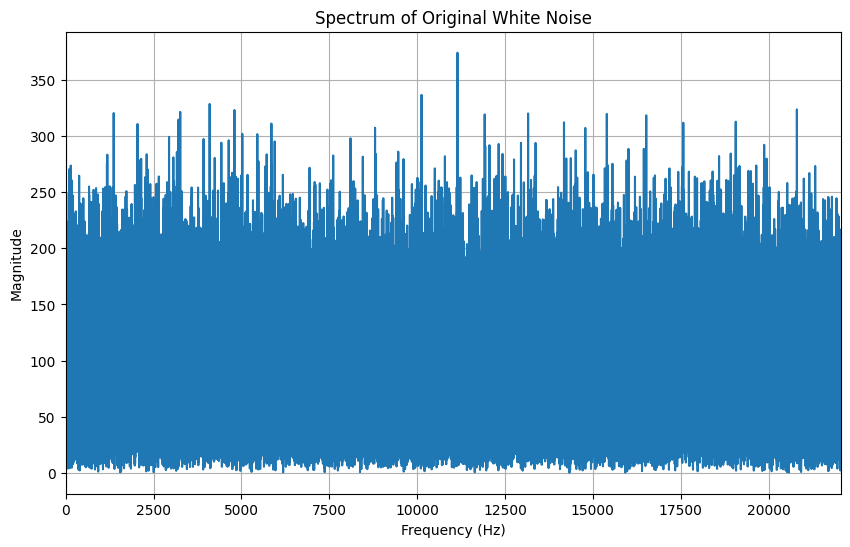

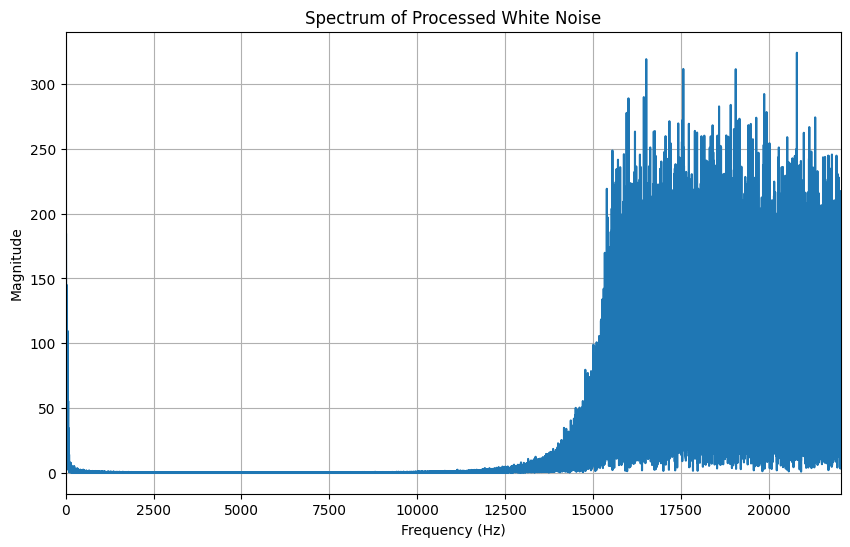

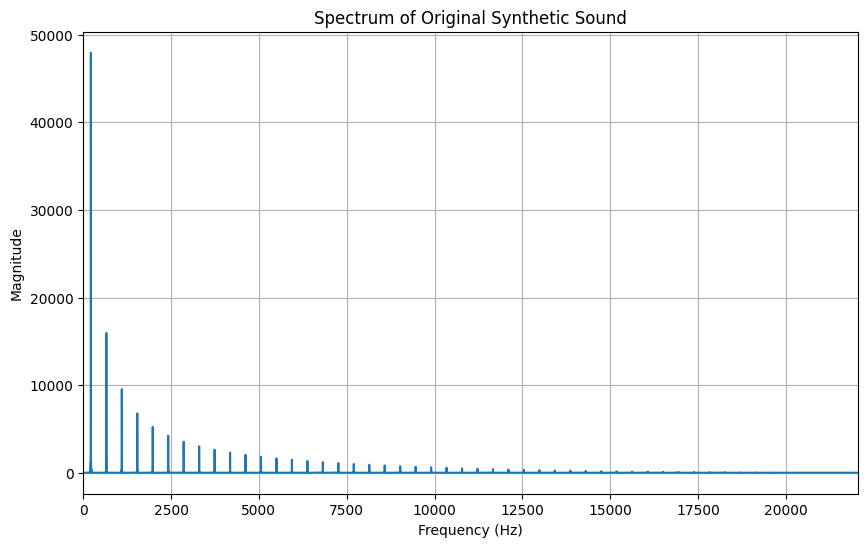

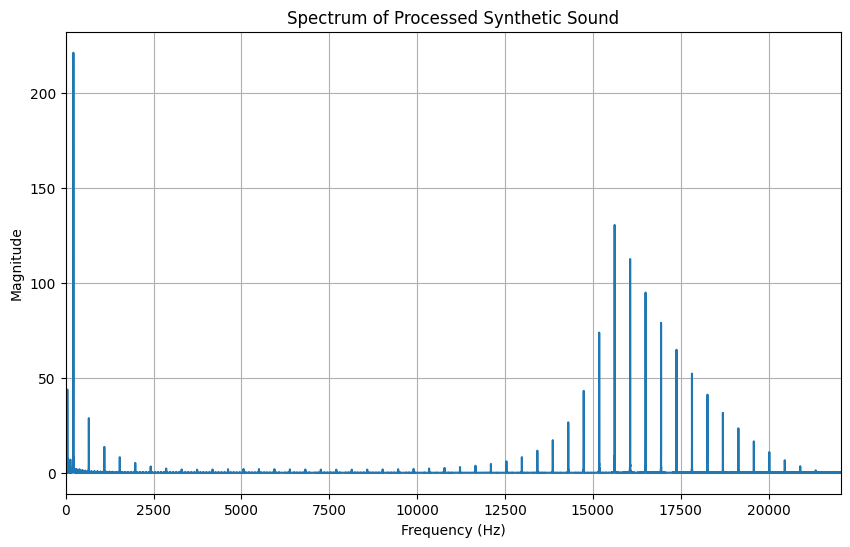

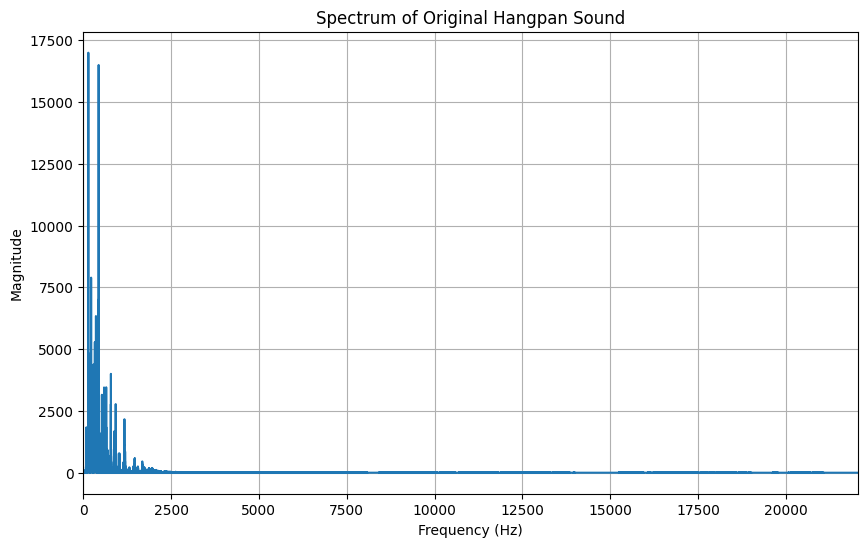

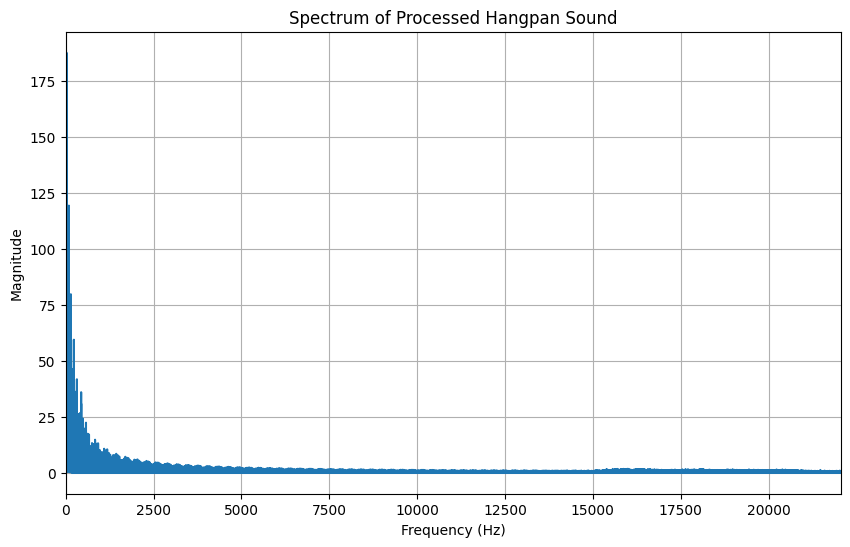

In [ ]:
# plot the magnitude spectrum
def plot_spectrum(signal, fs, title):
    N = len(signal)
    freqs = np.fft.fftfreq(N, 1/fs)
    spectrum = np.abs(fft(signal))

    plt.figure(figsize=(10, 6))
    plt.plot(freqs[:N//2], spectrum[:N//2])
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, fs / 2)
    plt.grid()
    plt.show()

# Plot spectra for original and processed sounds
plot_spectrum(x1, fs1, 'Spectrum of Original White Noise')
plot_spectrum(y1, fs1, 'Spectrum of Processed White Noise')

plot_spectrum(x2, fs2, 'Spectrum of Original Synthetic Sound')
plot_spectrum(y2, fs2, 'Spectrum of Processed Synthetic Sound')

plot_spectrum(x3, fs3, 'Spectrum of Original Hangpan Sound')
plot_spectrum(y3, fs3, 'Spectrum of Processed Hangpan Sound')


**Questions:**

1. **Apply the masking curve in quite to three different sounds with different characteristics (you choose). What do you hear? Does it result in the same effect for all of them? Explain. Support it with some spectral plots.**

  Aplicar la corba d'enmascarament de silenci a tres sons diferents genera efectes molt variats a causa de les seves característiques úniques. En el primer so, el soroll blanc, gairebé no s'escolta res; només es percep un soroll molt fluixet i agut, ja que la seva energia es uniforme en totes les freqüències i, per tant, es redueix significativament amb l'enmascarament. El segon so, que consisteix en tons sintètics, es percep molt fluix, però conserva certa semblança amb l'original; això és perquè conté frequencies específiques que no es veuen tan afectades per la corba. En canvi, el tercer so, el hangpan, ha perdut totalment el seu caràcter i no se sent en absolut; això passa perquè la seva complexitat harmònica no pot sobreviure l'aplicació del masking, resultant en una pèrdua total de l'identitat del so. Així, els resultats són diferents per cada so, ja que la seva resposta a l'enmascarament depèn de la seva composició espectral i dinàmica.

  L'anàlisi espectral mostra que la corba d'enmascarament té efectes diversos en els tres sons. El soroll blanc es redueix dràsticament, mentre que els tons sintètics mantenen certes freqüències, cosa que els fa menys afectats. En canvi, el hangpan perd completament el seu caràcter, ja que les seves freqüències distintives són anul·lades. Això ressalta com la composició espectral influeix en la resposta dels sons a l'enmascarament.

2. **Amplify one of the output sounds by a factor of 2. Any difference? describe.**

  Quan amplifiquem el white noise per un factor de 2, notem que el volum augmenta molt gràficament perquè ocupa totes les freqüències. Al gràfic temporal, veiem que els pics de l'ona es dupliquen, el que significa que els valors d'amplitud són més alts. Si aquests valors superen el rang [-1, 1], es produeix un clipping, que fa que el so soni dur o es trenqui, distorsionant el so original. Hem afegit una línia per limitar els valors amplificats dins d'aquest rang, de manera que el soroll blanc amplificat sona més intens però, sense clipping, conserva la seva qualitat uniforme i natural.

# Part 3 - Frequency masking
Explore frequency masking. Answer the questions given and modify the code as needed to support your answers.

In [ ]:
def f_SP_dB(maxfreq,nfilts):
    #usage: spreadingfunctionmatdB=f_SP_dB(maxfreq,nfilts)
    #computes the spreading function protoype, in the Bark scale.
    #Arguments: maxfreq: half the sampling freqency
    #nfilts: Number of subbands in the Bark domain, for instance 64

    maxbark=hz2bark(maxfreq) #upper end of our Bark scale:22 Bark at 16 kHz

    #Number of our Bark scale bands over this range: nfilts=64
    spreadingfunctionBarkdB=np.zeros(2*nfilts)

    #Spreading function prototype, "nfilts" bands for lower slope
    spreadingfunctionBarkdB[0:nfilts]=np.linspace(-maxbark*27,-8,nfilts)-23.5

    #"nfilts" bands for upper slope:
    spreadingfunctionBarkdB[nfilts:2*nfilts]=np.linspace(0,-maxbark*12.0,nfilts)-23.5
    return spreadingfunctionBarkdB

def mapping2bark(mX,W,nfft):
    #Maps (warps) magnitude spectrum vector mX from DFT to the Bark scale
    #arguments: mX: magnitude spectrum from fft
    #W: mapping matrix from function mapping2barkmat
    #nfft: : number of subbands in fft
    #returns: mXbark, magnitude mapped to the Bark scale

    nfreqs= nfft//2

    #Here is the actual mapping, suming up powers and conv. back to Voltages:
    mXbark = (np.dot( np.abs(mX[:nfreqs])**2.0, W[:, :nfreqs].T))**(0.5)

    return mXbark

def mappingfrombark(mTbark,W_inv,nfft):
    #usage: mT=mappingfrombark(mTbark,W_inv,nfft)
    #Maps (warps) magnitude spectrum vector mTbark in the Bark scale
    # back to the linear scale
    #arguments:
    #mTbark: masking threshold in the Bark domain
    #W_inv : inverse mapping matrix W_inv from matrix W for mapping back from bark scale
    #nfft: : number of subbands in fft
    #returns: mT, masking threshold in the linear scale

    nfreqs = nfft//2
    mT = np.dot(mTbark, W_inv[:, :nfreqs].T)
    return mT

def maskingThresholdBark(mXbark,spreadingfuncmatrix,alpha,fs,nfilts):
    #Computes the masking threshold on the Bark scale with non-linear superposition
    #usage: mTbark=maskingThresholdBark(mXbark,spreadingfuncmatrix,alpha)
    #Arg: mXbark: magnitude of FFT spectrum, on the Bark scale
    #spreadingfuncmatrix: spreading function matrix from function spreadingfunctionmat
    #alpha: exponent for non-linear superposition (eg. 0.6),
    #fs: sampling freq., nfilts: number of Bark subbands
    #nfilts: Number of subbands in the Bark domain, for instance 64
    #Returns: mTbark: the resulting Masking Threshold on the Bark scale

    #Compute the non-linear superposition:
    mTbark = np.dot(mXbark**alpha, spreadingfuncmatrix**alpha)

    #apply the inverse exponent to the result:
    mTbark = mTbark**(1.0/alpha)

    #Threshold in quiet:
    maxfreq = fs/2.0
    maxbark = hz2bark(maxfreq)
    step_bark = maxbark/(nfilts-1)
    barks=np.arange(0,nfilts)*step_bark

    #convert the bark subband frequencies to Hz:
    f=bark2hz(barks)+1e-6
    #Threshold of quiet in the Bark subbands in dB:
    LTQ=np.clip((3.64*(f/1000.)**-0.8 -6.5*np.exp(-0.6*(f/1000.-3.3)**2.)+1e-3*((f/1000.)**4.)),-20,160)
    #Maximum of spreading functions and hearing threshold in quiet:
    mTbark=np.max((mTbark, 10.0**((LTQ-60)/20)),0)
    return mTbark

def mapping2barkmat(fs, nfilts, nfft):
  #Constructing matrix W which has 1’s for each Bark subband, and 0’s else:
  #nfft=2048; nfilts=64;
  nfreqs=nfft//2
  maxfreq = fs/2.0
  maxbark = hz2bark(maxfreq)
  step_barks = maxbark/(nfilts-1)
  #the linspace produces an array with the fft band edges:
  binbarks = hz2bark(np.linspace(0,(nfft//2),(nfft//2)+1)*fs/nfft)
  W = np.zeros((nfilts, nfft))
  for i in range(nfilts):
    W[i,0:(nfft//2)+1] = (np.round(binbarks/step_barks)== i)
  return W

def mappingfrombarkmat(W,nfft):
    #Constructing inverse mapping matrix W_inv from matrix W for mapping back from bark scale
    #usuage: W_inv=mappingfrombarkmat(Wnfft)
    #argument: W: mapping matrix from function mapping2barkmat
    #nfft: : number of subbands in fft
    nfreqs=int(nfft/2)
    W_inv= np.dot(np.diag((1.0/np.sum(W,1))**0.5), W[:,0:nfreqs + 1]).T
    return W_inv

def spreadingfunctionmat(spreadingfunctionBarkdB, alpha, nfilts):
    #Turns the spreading prototype function into a matrix of shifted versions.
    #Convert from dB to "voltage" and include alpha exponent
    #nfilts: Number of subbands in the Bark domain, for instance 64
    spreadingfunctionBarkVoltage=10.0**(spreadingfunctionBarkdB/20.0*alpha)

    #Spreading functions for all bark scale bands in a matrix:
    spreadingfuncmatrix=np.zeros((nfilts,nfilts))

    for k in range(nfilts):
        spreadingfuncmatrix[k,:]=spreadingfunctionBarkVoltage[(nfilts-k):(2*nfilts-k)]

    return spreadingfuncmatrix

In [15]:
x, fs = read_sound('/content/drive/MyDrive/UNI/UPF/5è CURS/1r TRIM/SISTEMES DE CODIFICACIÓ ÀUDIO I VÍDEO/audio-coding-materials-main/sounds/750340-background-music.wav')

maxfreq = fs / 2
alpha = 0.8
nfilts = 64
N = 2048

W = mapping2barkmat(fs, nfilts, N)
W_inv = mappingfrombarkmat(W, N)
spreadingfunctionBarkdB = f_SP_dB(maxfreq, nfilts)
spreadingfuncmatrix = spreadingfunctionmat(spreadingfunctionBarkdB, alpha, nfilts)

y = np.zeros(len(x))

i = 0
while i < x.size - N:
    w = signal.get_window('hann', N)
    xw = x[i:i + N] * w
    X = fft(xw)
    mX = 20 * np.log10(abs(X))
    pX = np.angle(X)

    mXbark = mapping2bark(mX, W, N)
    mTbark = maskingThresholdBark(mXbark, spreadingfuncmatrix, alpha, fs, nfilts)
    mT = 20 * np.log10(mappingfrombark(mTbark, W_inv, N))
    masking_curve = np.append(mT, np.flip(mT[:N // 2 - 1])) - 60
    masking_curve = np.clip(masking_curve, -50, 0)

    mX += masking_curve
    Y = 10 ** (mX / 20) * np.exp(1j * pX)
    yt = np.real(ifft(Y))
    y[i:i + N] += yt
    i += N // 2

plt.figure(figsize=(10, 4))
plt.specgram(x, NFFT=1024, Fs=fs, noverlap=512, cmap='viridis')
plt.title("INPUT SIGNAL")
plt.xlabel("Tiempo [s]")
plt.ylabel("Frecuencia [Hz]")
plt.colorbar(label='Intensidad [dB]')
plt.show()

plt.figure(figsize=(10, 4))
plt.specgram(y, NFFT=1024, Fs=fs, noverlap=512, cmap='viridis')
plt.title("OUTPUT SIGNAL")
plt.xlabel("Tiempo [s]")
plt.ylabel("Frecuencia [Hz]")
plt.colorbar(label='Intensidad [dB]')
plt.show()

section_start = 50000
section_end = section_start + N
x_section = x[section_start:section_end]
y_section = y[section_start:section_end]

X_section = fft(x_section * w)
mX_section = 20 * np.log10(np.abs(X_section))

Y_section = fft(y_section * w)
mY_section = 20 * np.log10(np.abs(Y_section))

plt.figure(figsize=(10, 4))
plt.plot(mX_section, label="Señal de entrada")
plt.plot(mY_section, label="Señal de salida", linestyle='--')
plt.title("SPECTRA SUPERPOSITION")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.legend()
plt.show()

display_sound(x, fs)
display_sound(y, fs)


Output hidden; open in https://colab.research.google.com to view.

**Questions:**

1. **Apply frequency masking to one sound you choose. Compute and display the spectrogram of both the input and output sounds. Superpose, in the same plot, the magnitude spectrum of a particular section of the input sound with the magnitude spectrum of the same time location of the output sound. Explain the difference between the two spectrograms and the two spectra.**

  Els dos espectrogrames mostren les freqüències dels senyals d'entrada i sortida al llarg del temps. En l'espectrograma d'entrada, les freqüències no estan molt ben distribuïdes, amb algunes zones de baixa intensitat. En canvi, l'espectrograma de sortida presenta un efecte de masking més uniforme, sobretot a les freqüències altes, on l'energia està més repartida, probablement a causa de la corba de masking aplicada.

  Els espectres en el tercer gràfic se centren en una part específica del senyal. L'espectre d'entrada té pics molt marcats, mentre que l'espectre de sortida mostra pics més suaus i menys intensos. Això indica que el masking ha reduït certes freqüències, aplanant la resposta de freqüència general. Aquest canvi es deu a l'atenuació aplicada a les freqüències en funció del llindar de masking.
